# Skills evaluator math model

## Problem description

It's required to provide the evaluation of an engineer's skills for Cuban Engineer platform users. The skills evaluation process use the data extracted from Cuban Engineer providers to use only verified data. Since the most important sources provide custom skill measures, it's required to process all provider's data. As well as to merge redundant skills data, summarize the output in a single score per skill, and infer skills that are not explicitly provided.

### Objectives

* Provide a fair engineer skills evaluation 
* Preprocess input data according to each provider API 
* Build a summarized evaluation model with all the engineer's skills extracted from different providers
* Infer verified but not explicitly provided skills from the data

### Hypothesis

All **Cuban Engineer** platform users are mainly software related professionals, so they must have a set of related skills and will have published pieces of information about their skills in several public sources. 

### Objects description and acquired data

For the evaluation process the **Objects** are the Cuban Engineer user's data from each provider.

The current providers are: 
* GitHub
* GitLab
* StackExchange


#### GitHub

It's a VCS for developers that stores code statistics and user's collaborative behaviour.

**Provided data**

* **User followers**: User followers count. An integer value.
* **A set of repositories**: Each repository has a set of code statistics.
* **Repository id**: An identifier.
* **Repository forked**: Define if the repository is forked or not. Boolean value.
* **Repository contributors**: Amount of project contributors. An integer value.
* **Repository stars**: Amount of project stars. An integer value.
* **Repository forks**: Amount of project forks. An integer value.
* **Repository views**: Amount of project views. An integer value.
* **Repository total commits**: Amount of project commits. An integer value.
* **Repository user commits**: Amount of user commits. An integer value.
* **Repository total additions**: Amount of bytes of code added to the project. An integer value.
* **Repository user additions**: Amount of bytes of code added by the user. An integer value.
* **A set of skills**: Programming languages or scripts used in each repository named Skill in this context.
* **Skill repository id**: A repository identifier reference.
* **Skill name**: Programming language or script used. A string value.
* **Skill value**: Amount of bytes of code for that programming language or script used. An integer value.


#### GitLab

It's a VCS for developers that stores code statistics and user's collaborative behaviour 

**Provided data**
* **User followers**: User followers count. An integer value.
* **A set of repositories**: Each repository has a set of code statistics.
* **Repository id**: An identifier.
* **Repository forked**: Define if the repository is forked or not. Boolean value.
* **Repository contributors**: Amount of project contributors. An integer value.
* **Repository stars**: Amount of project stars. An integer value.
* **Repository forks**: Amount of project forks. An integer value.
* **Repository views**: Amount of project views. An integer value.
* **Repository total commits**: Amount of project commits. An integer value.
* **Repository user commits**: Amount of user commits. An integer value.
* **A set of skills**: Programming languages or scripts used in each repository named Skill in this context.
* **Skill repository id**: A repository identifier reference.
* **Skill name**: Programming language or script used. A string value.
* **Skill value**: Amount of bytes of code for that programming language or script used, a float value. It's required to denote that this value is obtained with the amount of bytes of the whole project multiplied by the percent of skill present in that project, for that reason it's required a noise reduction step in the skill evaluation process.  


#### StackExchange

It's a Questions-Answers platform to share knowledge between the users

**Provided data**

* **User reputation**: It's a rough measurement of how much the community trusts in the user.
* **A set of skills (Tags)**: A tag is a keyword or label that categorizes your question with other similar questions, but it usually represents the main topic and certain related skill. This information is provided by the StackExchange API and not in the input data. 
* **Skill name**: Tag name inside of the platform.
* **Skill score**: Score of the user in that tag.


### Expected results and evaluation

The output is a set of evaluated skills for each Cuban Engineer user that complies with the following requirements: 

* The skill value represents the user's final score for each data provider
* The skills value output must be scaled to the user's desired range of values
* New non-explicit skills can be inferred from the input data
* A final skills evaluation is provided to summarize the information from each provider    

The evaluated result must be tested with a data set extracted from known users of the platform. The test set will not provide an evaluation value, instead it will sort the engineers according to several skills and an overall evaluation. The evaluator result should have a similar output when the values are sorted in the same way that the test set. This process will define the evaluation algorithm quality.

## Problem formalization

### Objectives formalization

The algorithm must use the data from different providers to estimate how good an engineer is in a set of skills explicit or not in provided data. To achieve this goal, several processing steps are required: 

* **Name homogenization**: Transform the skills name to a single structure due to different providers may name the same skill in different ways (e.g. 'C++' and 'Cpp').
* **Input value determination**: The skill's input value is required from each provider. Could be a single value (e.g. StackExchange's score) or a linear combination of values (e.g. a GitHub project data).
* **Value normalization**: Transform the skill value from different providers to the same numerical scale to allow a more precise comparison between input values.
* **Skill inference**: Using the data provided infer non-explicit skills and their evaluation keeping in mind that inferred skills must be known by the user, so concepts like probability or correlation must not be used in the inference process.  
* **Result merging**: Since some providers have a project structured data, it's required to process and summarize the data of each project to achieve a final provider evaluation. The same is required to define an user's final skill evaluation using the result of the different providers. It's required to define the merge process between projects and providers to achieve a summarized and fair evaluation result.

### Data representation

The input data for each user is structured in a JSON format like the following example:

In [ ]:
input_json = """
{
    "name": "John Doe",
    "nick": "JohnDoe",
    "email": "johndoe@gmail.com",
    "profiles": [
        {
            "provider": "STACK_EXCHANGE",
            "stats": {
                "reputation": 7849
            },
            "skills": [
                {
                    "repositoryId": 0,
                    "name": "angular",
                    "value": 523.0
                },
                {
                    "repositoryId": 0,
                    "name": "unit-testing",
                    "value": 20.0
                },
                {
                    "repositoryId": 0,
                    "name": "chromium",
                    "value": 36.0
                },
                {
                    "repositoryId": 0,
                    "name": "docker",
                    "value": 12.0
                },
                {
                    "repositoryId": 0,
                    "name": "gitlab",
                    "value": 1.0
                },
                {
                    "repositoryId": 0,
                    "name": "highcharts",
                    "value": 41.0
                },
                {
                    "repositoryId": 0,
                    "name": "intellij-idea",
                    "value": 19.0
                },
                {
                    "repositoryId": 0,
                    "name": "java",
                    "value": 178.0
                },
                {
                    "repositoryId": 0,
                    "name": "javascript",
                    "value": 1124.0
                },
                {
                    "repositoryId": 0,
                    "name": "matplotlib",
                    "value": 1.0
                },
                {
                    "repositoryId": 0,
                    "name": "python",
                    "value": 7.0
                },
                {
                    "repositoryId": 0,
                    "name": "rest",
                    "value": 89.0
                }
            ]
        },
        {
            "provider": "GITHUB",
            "stats": {
                "followers": "2"
            },
            "repositories": [
                {
                    "id": 1,
                    "isFork": false,
                    "contributors": 1,
                    "totalCommits": 809,
                    "userCommits": 413,
                    "forks": 0,
                    "stars": 0,
                    "views": 0,
                    "userAdditions": 175800,
                    "totalAdditions": 297600
                },
                {
                    "id": 2,
                    "isFork": false,
                    "contributors": 0,
                    "totalCommits": 697,
                    "userCommits": 697,
                    "forks": 38,
                    "stars": 143,
                    "views": 83,
                    "userAdditions": 33486,
                    "totalAdditions": 33486
                }
            ],
            "skills": [
                {
                    "repositoryId": 1,
                    "name": "Java",
                    "value": 297600.0
                },
                {
                    "repositoryId": 2,
                    "name": "JavaScript",
                    "value": 24444.0
                },
                {
                    "repositoryId": 2,
                    "name": "HTML",
                    "value": 5357.0
                },
                {
                    "repositoryId": 2,
                    "name": "CSS",
                    "value": 2344.0
                }
            ]
        },
        {
            "provider": "GITLAB",
            "stats": {},
            "repositories": [
                {
                    "id": 1,
                    "isFork": true,
                    "contributors": 0,
                    "totalCommits": 1025,
                    "userCommits": 0,
                    "forks": 0,
                    "stars": 0,
                    "views": 0
                },
                {
                    "id": 2,
                    "isFork": false,
                    "contributors": 0,
                    "totalCommits": 1250,
                    "userCommits": 789,
                    "forks": 40,
                    "stars": 168,
                    "views": 75
                }
            ],
            "skills": [
                {
                    "repositoryId": 1,
                    "name": "C++",
                    "value": 1195539.49
                },
                {
                    "repositoryId": 1,
                    "name": "CMake",
                    "value": 251494.5
                },
                {
                    "repositoryId": 2,
                    "name": "Java",
                    "value": 963216.55
                },
                {
                    "repositoryId": 2,
                    "name": "HTML",
                    "value": 1546.45
                }
            ]
        }
    ]
}
"""


The JSON format follows the data description provided before. The GitLab provided skill 'value' definition is described below. 

### Data properties

As denoted in the previous section, each provider has distinct data that must be processed independently. For that reason it's required to describe the data properties for each provider. Since each provider's data is described in a previous section, this section will be focused on the main differences between them.


#### GitHub

The data describes user code stats related to a set of projects. Also, each project has a set of related skills. Next, the meaning of the most important fields in the problem context are presented as:

* **User followers**: A good programmer should have more followers but is not an assurance.
* **Repository forked**: A forked project means that the main ideas of the project are not from the user and could be used to reduce the relevance of the project for the user.
* **Repository contributors**: A project with more contributors means that it is a team project, but user contributions are not as relevant as individual projects due to project commits are not only from the user.
* **Repository stars**: Usually, a good project is rated by other users, increasing the project relevance.
* **Repository forks**: A project with interesting ideas is usually forked by other users increasing the project relevance.
* **Repository views**: Users interested in the project behaviour and evolution use the views to keep track of it. 
* **Repository user commits**: A mature project should have more commits from the user. This value can be used to get an idea about the user's contributions to the project.
* **Repository user additions**: Measure the amount of bytes of code added by the user.
* **Skill value**:  Value of a repository related skill, it is defined by the API.

All the described repository fields can be used to define the relevance of the project and user contributions to it. All the information is obtained using GitHub API from the user's public repositories.

#### GitLab

The data describes user code stats related to a set of projects. Also, each project has a set of related skills. Next, the meaning of the most important fields in the problem context are presented as:

* **User followers**: A good engineer should have more followers but is not a quality assurance.
* **Repository forked**: A forked project means that the main ideas of the project are not from the user and could be used to fit the relevance of the project for the user.
* **Repository contributors**: A project with more contributors means that it is a team project, but user contributions are not as relevant as individual projects due to project commits are not only from the user.
* **Repository stars**: Usually, a good project is rated by other users, increasing the project relevance.
* **Repository forks**: A project with interesting ideas is usually forked by other users increasing the project relevance.
* **Repository Views**: Users interested in the project behaviour and evolution use the views to keep track of it. 
* **Repository user commits**: A mature project should have more commits from the user. This value can be used to get an idea about the user's contributions to the project.
* **Skill value**:  Value of a repository related skill. It's the relation between the user contributions (commits), the skill usage percent and the repository used space in bytes, all values provided by GitLab API.

All the  described repository fields can be used to define the relevance of the project and user contributions to it.


#### StackExchange

The data describes the user's activity inside the platform. The skills of the user are identified using the tags inside the platform. Next, the meaning of most important fields in the problem context are presented as:

* **User reputation**: A higher skilled person should have a higher reputation.This is also is a way to measure the trust of others.
* **Skill name**: The skill definition that should be correlated with synonyms if it has them. 
* **Skill score**: The punctuation provided by the platform in answers related to a skill (tag). A skilled user will have a higher score evaluation.
 

## Solution strategy

Based on provided problem description, it's required to define a solution model. The problem has the following information levels in the evaluation process:

* **Project**: The data about a project for project structured providers
* **Provider**: Provider data or projects summarization for project structured providers
* **User**: The user-level summarizes the data from each provider to achieve a final result

To provide an accurate solution, it's required to process the data in a bottom-up data flow making a partial evaluation until the final (user) level.

### Problem formalization

In **Cuban Engineer** platform it's required to find non-explicit skills and evaluate all of them using the data from stored providers as input data. Since **Cuban Engineer** platform does not have a previously evaluated set of users, a supervised learning approach can not be used. Also, all the system data is required to be updated with the new skills. Relations between them change frequently and the relations between explicit and non-explicit skills are not contained in a centralized data source. 

*To provide a solution to the problem it's decided to use a knowledge-based approach where the skills and their relations are represented in a knowledge base that can be used to evaluate and infer non explicit skills.* 

To represent knowledge, there are several structures such as rules, frames and networks. The main drawback about rules and frames is related to the knowledge base size, due to a big knowledge base being very complicated to maintain and when a knowledge base achieves more than 100 rules is recommended to change the knowledge representation structure. In this problem, the complexity of the knowledge base is unknown and needs to be frecuently updated. 

The network's approach, also named graph approach, is easier to maintain, due to it not being required to know and understand the whole system's behaviour and the expected result can be achieved by updating a sub-graph in the model. For this approach, two of the most relevant methods are the Bayesian Networks and the Fuzzy Cognitive Maps. The Bayesian Networks are represented as Trees, so a common base concept that is related with two other concepts must be repeated in the structure, making the knowledge base size bigger. Also, the concept represented in the edges is probability and in the current problem's context, the skill knowledge assurance is required and not the probability that the user knows something. On the other hand, the Fuzzy Cognitive Maps is a digraph structured knowledge base that represents causality and the knowledge base maintaining process is more simple than other structures. 

*For this problem Fuzzy Cognitive Maps will be used to represent the knowledge base and solve the problem described*

#### Fuzzy Cognitive Maps (FCM)

Mathematically it can be defined as the 4-tuple $(C,W,A,f)$, where:

* $C=(c_1,c_2,c_3, ~...~ c_n)$ is the set of nodes of the graph
* $W:(c_i,c_j)\to w_{ij}$ is the function that determines the value of the causal relation between the nodes $c_i$ and $c_j$
* $A:(c_i,t) \to A^t_i, A \in R$ is the function used to determine the activation degree of each system concept over time $t=(1,2,3, ~...~T)$
* $f \in [-1, 1]$ is the function used to limit each concept activation range in a desired interval $[-1, 1]$

Structurally a FCM can be represented as a digraph where the value of the causal relation between two nodes $c_i$ and $c_j$ is represented in component $w_{ij}$ that belongs to weight matrix $W$. 

The FCM's inference process is the propagation of each node weight to his neighbours over time. This process may be endless because the FCM topology may contain loops like a recurrent neural network. For this reason, two stop criteria are defined, a maximum number of iterations $T$ and a minimum difference between nodes vector $\alpha$ in the times $t$ y $t+1$. The inference process is summarized in the following equation. 
$$$$
$$A^{(t+1)}_i = f\left(\sum_{j=1}^N w_{ij}*A^{(t)}_j \right) , i \neq j$$

In the current problem context, the FCM will represent the skills as the map concepts and the relations between skills as the edges. A verified skill value will be set and transformed to corresponding concept initial activation value. After all initial values are set the inference process will be executed until a stop criteria is fulfilled. Finally, the greatest activation value of each node is selected as the evaluation for the user skills. The nodes with an activation value greater than zero are the user final skills and corresponding activation value will be the skill evaluation.

### Processing model

The algorithm will take as input a JSON object with the same structure as *Data representation* section example. The evaluation and inference process will be carried out in several steps. The experts will build a single knowledge base to represent the skills that the user may have and the relations between them. According to the information levels described above and the provider's structure, several processing steps are required, but all steps are executed with the same knowledge base. 
To move the information from a level to the next one, it's required to merge the current level data. Also to provide a project-based provider evaluation, it's required to merge the inference result from the contained projects and run the inference process again, because new results may appear. The same process must be done in the user level, to provide a final user skills evaluation. 

#### FCM parameters selection 

Previously, a brief FCM description was provided, but to use the algorithm, it's required to define the specific behaviour in the problem context. To execute all the defined processing steps, it's required to use a tool that allows to load a knowledge base, execute the inference process and merge different maps in a new single structure. For that purpose, the library Py-FCM can be used.

##### Install Py-FCM and define used params

In [ ]:
# install script
import sys
import subprocess
subprocess.check_call([sys.executable, "-m", "pip", "install", 'py-fcm'])

0

The Py-FCM library provides several parameters to define FCM behaviour:

* Maximum iterations: max_it=200
* Stability difference: stab_diff=0.001
* Use concepts memory: mem_influence=False
* Decision function: decision_function="EXITED"
* Default activation function: activ_function="sigmoid_hip"

**Params detailed description:**

*max_it*: It's recommended to set max_it in a value greater than 100 to allow the map reach a stabilized state, but if the value is too big and a stable state is not reached then the inference process will be longer.

*stab_diff*: It's recommended to set a value lower than 0.1 to allow the map reach a true stabilized state a greater value could mislead to a false stable state and a not desired solution. Also, it's not recommended to set a value too small when using an asymptotic function like sigmoid or a logarithmic-based function, due to it taking more time to achieve that state's difference and the inference process will be longer.

*mem_influence*: Define if the current concept value is used or not in the next iteration. In the problem context,  must be set as *False* (default value) to prevent noise in the results. E.g. if one skill is set to a value $x$ as initial state and is influenced in $y$ by other skill in the next iteration, the concept value will be $x+y$ and may continue growing during the inference process. 

*decision_function*: At the end of the inference process it's required to define the way to select the concept (skill) value according to its behaviour. Py-FCM allows three ways to define the final result: *average* (by default), *last*, and *exited*. In problem context, *exited* must be used to select the highest concept value during the inference process. This selection, together with no use of memory influence, will allow achieving a fair skill final evaluation. 

*activ_function*: In the problem context, the skills are evaluated using data from providers, so there is a limit to how much can be extracted from the data and also from the knowledge base about some skill. The best way to represent this behaviour is by using an asymptotic function. Py-FCM allows using two different asymptotic functions: *sigmoid* and *sigmoid_hip* (by default) that most simply are represented like:

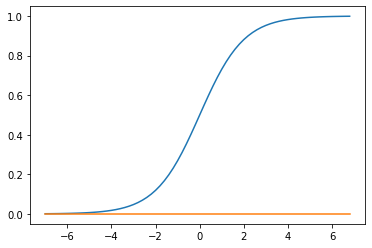

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from py_fcm import functions

# sigmoid function plot
result = []
zero = []
x = np.arange(-7., 7., 0.2)
for value in x:
    zero.append(0)
    result.append(functions.Activation.sigmoid(value))

plt.plot(x,result)
plt.plot(x,zero)
plt.show()

As observed, the *sigmoid* function is in $(0,1)$ range of values. But, the most important thing is that the function value for a $0$ input is a $0.5$ output which means, in the problem context, that one skill with a $0$ (not provided information about it) evaluation will have at least a $0.5$ final evaluation, a really noisy skill evaluation.

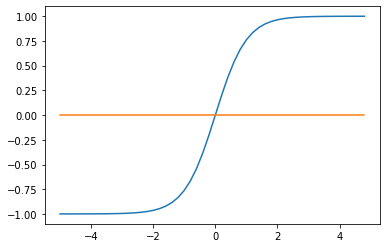

In [ ]:
# sigmoid function plot
result = []
x = np.arange(-5., 5., 0.2)
zero = []
for value in x:
    zero.append(0)
    result.append(functions.Activation.sigmoid_hip(value))
    
plt.plot(x,result)
plt.plot(x,zero)
plt.show()

On the other hand, the *sigmoid_hip* function shows a more natural behaviour in the problem context and allows it to work with negative evaluations due to the output value is in $(-1,1)$ range. The *sigmoid_hip* function is selected as the FCM activation function. 

##### Define the knowledge base

Py-FCM allows it to load a knowledge base previously defined and structured in a JSON format like shown the following example. The knowledge base presented is a simplified version that is used in the current problem to show the data's behaviour during the processing pipeline. 

In [ ]:
knowledge_base = """
{
  "max_iter": 500,
  "activation_function": "sigmoid_hip",
  "memory_influence": false,
  "decision_function": "EXITED",
  "concepts": [
    {
      "id": "QMAKE",
      "type": "SIMPLE"
    },
    {
      "id": "QML",
      "type": "SIMPLE"
    },
    {
      "id": "SHELL",
      "type": "SIMPLE"
    },
    {
      "id": "BASH",
      "type": "SIMPLE"
    },
    {
      "id": "HASKELL",
      "type": "SIMPLE"
    },
    {
      "id": "LUA",
      "type": "SIMPLE"
    },
    {
      "id": "PERL",
      "type": "SIMPLE"
    },
    {
      "id": "CLOJURE",
      "type": "SIMPLE"
    },
    {
      "id": "ELIXIR",
      "type": "SIMPLE"
    },
    {
      "id": "JULIA",
      "type": "SIMPLE"
    },
    {
      "id": "GROOVY",
      "type": "SIMPLE"
    },
    {
      "id": "ERLANG",
      "type": "SIMPLE"
    },
    {
      "id": "CUDA",
      "type": "SIMPLE"
    },
    {
      "id": "C++",
      "type": "SIMPLE"
    },
    {
      "id": "C",
      "type": "SIMPLE"
    },
    {
      "id": "RUST",
      "type": "SIMPLE"
    },
    {
      "id": "OBJECTIVE-C",
      "type": "SIMPLE"
    },
    {
      "id": "C#",
      "type": "SIMPLE"
    },
    {
      "id": "DART",
      "type": "SIMPLE"
    },
    {
      "id": "SWIFT",
      "type": "SIMPLE"
    },
    {
      "id": "GO",
      "type": "SIMPLE"
    },
    {
      "id": "RUBY",
      "type": "SIMPLE"
    },
    {
      "id": "MATLAB",
      "type": "SIMPLE"
    },
    {
      "id": "R",
      "type": "SIMPLE"
    },
    {
      "id": "PYTHON",
      "type": "SIMPLE"
    },
    {
      "id": "KOTLIN",
      "type": "SIMPLE"
    },
    {
      "id": "SCALA",
      "type": "SIMPLE"
    },
    {
      "id": "JAVA",
      "type": "SIMPLE"
    },
    {
      "id": "TYPESCRIPT",
      "type": "SIMPLE"
    },
    {
      "id": "COFFEESCRIPT",
      "type": "SIMPLE"
    },
    {
      "id": "PHP",
      "type": "SIMPLE"
    },
    {
      "id": "JAVASCRIPT",
      "type": "SIMPLE"
    },
    {
      "id": "HTML",
      "type": "SIMPLE"
    },
    {
      "id": "CSS",
      "type": "SIMPLE"
    },
    {
      "id": "DOTNET",
      "type": "SIMPLE"
    },
    {
      "id": "NODE.JS",
      "type": "SIMPLE"
    },
    {
      "id": "INTENSIVE_DATA_PROCESSING",
      "type": "DECISION"
    },
    {
      "id": "INFRASTRUCTURE",
      "type": "DECISION"
    },
    {
      "id": "WEB_FRONTEND",
      "type": "DECISION"
    },
    {
      "id": "BACKEND",
      "type": "DECISION"
    },
    {
      "id": "SCRIPTING",
      "type": "DECISION"
    },
    {
      "id": "QT-FRAMEWORK",
      "type": "DECISION"
    },
    {
      "id": "NUMERICAL_ANALYSIS",
      "type": "DECISION"
    },
    {
      "id": "STATISTICS",
      "type": "DECISION"
    }
  ],
  "relations": [
    {
      "origin": "COFFEESCRIPT",
      "destiny": "NODE.JS",
      "weight": 1
    },
    {
      "origin": "R",
      "destiny": "STATISTICS",
      "weight": 1
    },
    {
      "origin": "PHP",
      "destiny": "BACKEND",
      "weight": 1
    },
    {
      "origin": "RUBY",
      "destiny": "BACKEND",
      "weight": 0.62
    },
    {
      "origin": "KOTLIN",
      "destiny": "BACKEND",
      "weight": 0.61
    },
    {
      "origin": "JAVA",
      "destiny": "BACKEND",
      "weight": 0.57
    },
    {
      "origin": "PYTHON",
      "destiny": "BACKEND",
      "weight": 0.32
    },
    {
      "origin": "GO",
      "destiny": "BACKEND",
      "weight": 0.77
    },
    {
      "origin": "C#",
      "destiny": "DOTNET",
      "weight": 0.71
    },
    {
      "origin": "CUDA",
      "destiny": "NUMERICAL_ANALYSIS",
      "weight": 1
    },
    {
      "origin": "MATLAB",
      "destiny": "NUMERICAL_ANALYSIS",
      "weight": 1
    },
    {
      "origin": "R",
      "destiny": "NUMERICAL_ANALYSIS",
      "weight": 0.83
    },
    {
      "origin": "QML",
      "destiny": "QT-FRAMEWORK",
      "weight": 1
    },
    {
      "origin": "QMAKE",
      "destiny": "QT-FRAMEWORK",
      "weight": 1
    },
    {
      "origin": "CUDA",
      "destiny": "INTENSIVE_DATA_PROCESSING",
      "weight": 1
    },
    {
      "origin": "ERLANG",
      "destiny": "INTENSIVE_DATA_PROCESSING",
      "weight": 0.68
    },
    {
      "origin": "SCALA",
      "destiny": "INTENSIVE_DATA_PROCESSING",
      "weight": 0.42
    },
    {
      "origin": "HASKELL",
      "destiny": "INTENSIVE_DATA_PROCESSING",
      "weight": 0.5
    },
    {
      "origin": "PYTHON",
      "destiny": "SCRIPTING",
      "weight": 0.27
    },
    {
      "origin": "LUA",
      "destiny": "SCRIPTING",
      "weight": 0.43
    },
    {
      "origin": "SHELL",
      "destiny": "SCRIPTING",
      "weight": 1
    },
    {
      "origin": "BASH",
      "destiny": "SCRIPTING",
      "weight": 1
    },
    {
      "origin": "SHELL",
      "destiny": "INFRASTRUCTURE",
      "weight": 0.77
    },
    {
      "origin": "BASH",
      "destiny": "INFRASTRUCTURE",
      "weight": 0.62
    },
    {
      "origin": "COFFEESCRIPT",
      "destiny": "WEB_FRONTEND",
      "weight": 1
    },
    {
      "origin": "TYPESCRIPT",
      "destiny": "WEB_FRONTEND",
      "weight": 1
    },
    {
      "origin": "JAVASCRIPT",
      "destiny": "WEB_FRONTEND",
      "weight": 1
    },
    {
      "origin": "HTML",
      "destiny": "WEB_FRONTEND",
      "weight": 0.25
    },
    {
      "origin": "CSS",
      "destiny": "WEB_FRONTEND",
      "weight": 0.1
    }
  ]
}
"""

Load the knowledge base and build the FCM. As we can see, the params are defined inside the JSON structure.

In [ ]:
import json
from py_fcm import from_json
def load_kb():
    kb = from_json(knowledge_base)
    kb.set_map_decision_function("EXITED")
    kb.flag_mem_influence = False
    return kb
        
# show FCM
json_fcm = load_kb().to_json()
parsed_fcm = json.loads(json_fcm)
print(json.dumps(parsed_fcm, indent=4))

{
    "max_iter": 500,
    "decision_function": "EXITED",
    "activation_function": "sigmoid_hip",
    "memory_influence": false,
    "stability_diff": 0.001,
    "stop_at_stabilize": true,
    "extra_steps": 5,
    "weight": 1,
    "concepts": [
        {
            "id": "QMAKE",
            "is_active": true,
            "type": "SIMPLE",
            "activation": 0.0
        },
        {
            "id": "QML",
            "is_active": true,
            "type": "SIMPLE",
            "activation": 0.0
        },
        {
            "id": "SHELL",
            "is_active": true,
            "type": "SIMPLE",
            "activation": 0.0
        },
        {
            "id": "BASH",
            "is_active": true,
            "type": "SIMPLE",
            "activation": 0.0
        },
        {
            "id": "HASKELL",
            "is_active": true,
            "type": "SIMPLE",
            "activation": 0.0
        },
        {
            "id": "LUA",
            "is_active"

Up to this point, all the required information to make the inference process is complete. Now, it's required to process each provider data according to the problem steps defined.

##### Merge FCMs

As mentioned previously, during the processing pipeline it's required to merge different FCM according to the current process step. To carry out this, Py-FCM provides a *join_maps* function with this purpose. The function has several parameters that must be defined to avoid noise in the final result.

**Arguments description**

* node_strategy: Strategy to join all maps nodes
  * union: the new FuzzyCognitiveMap will have the set union of nodes in map_set (default)
  * intersection: the new FuzzyCognitiveMap will have the set intersection of nodes in  map_set
* value_strategy: Strategy to define the initial state of map nodes
  * highest: Select the highest node value as initial node state
  * lowest: Select the lowest node value as initial node state
  * average: Select the average of node values as initial node state (default)
* relation_strategy: Strategy to define the value for repeated relations weight in map topology
  * highest: Select the highest relation value as new relation value
  * lowest: Select the lowest relation value as new relation value
  * average: Select the average of relations values as new relation value (default)
* ignore_zeros: Ignore zero evaluated concepts in value_strategy selected (default False)

Since all the maps are equal, there is no output difference between *node_strategy* and *relation_strategy* used. To provide a fair evaluation process, it's proposed to use *average* as *value_strategy*. Also, *ignore_zeros* must be set to *True* because when the user has, for instance, seven projects to merge and only one has code in JAVA with evaluation $v=1$, the JAVA final evaluation for that provider will be (using *average* as *value_strategy*) $final=v/7$. This happened because the $0$ data is used in the average formula from projects without JAVA code, adding noise in the final result. 

##### Value normalization

To provide an acurate node activation according to the experected input values, it's required to define a normalization strategy. Since for each value there is a certain point where no matter how great is the number, it will no longer contribute to the user's skills, this process is carried out using the proposed *sigmoid hip* function and fitting the  funtion's lambda arg according to the expected input values. For that reason, it's required to create several constants to define the proper value required to consider a relevant contribution. Using that value, the lambda value for *sigmoid* function can be estimated, normalizing the input value for the algorithm. The values defined are a proposal and can be updated according to the algorithm's expected behaviour.


In [ ]:
from py_fcm import functions

# estimate bytes of code lambda value
MINIMUM_BYTES_OF_CODE_TO_CONSIDER_RELEVANT_PROJECT = 30000
# this means: when an user reach an amount of bytes of code higher than 3 * 30000 it will receive a 60% of the evaluation
SRC_LAMBDA_VALUE = functions.Activation.sigmoid_hip_lambda(3 * MINIMUM_BYTES_OF_CODE_TO_CONSIDER_RELEVANT_PROJECT, 0.6)
DEFAULT_LAMBDA_VALUE = 0.01

# estimate commits lambda value
MEAN_OF_RELEVANT_PROJECT_COMMITS = 100
COMMITS_LAMBDA_VALUE = functions.Activation.sigmoid_hip_lambda(MEAN_OF_RELEVANT_PROJECT_COMMITS, 0.5)

# estimate forks lambda value
MEAN_OF_RELEVANT_PROJECT_FROKS = 10
FORKS_LAMBDA_VALUE = functions.Activation.sigmoid_hip_lambda(MEAN_OF_RELEVANT_PROJECT_FROKS, 0.5)

# estimate views lambda value
MEAN_OF_RELEVANT_PROJECT_VIEWS = 15
VIEWS_LAMBDA_VALUE = functions.Activation.sigmoid_hip_lambda(MEAN_OF_RELEVANT_PROJECT_VIEWS, 0.5)

# estimate stars lambda value
MEAN_OF_RELEVANT_PROJECT_STARS = 20
STARS_LAMBDA_VALUE = functions.Activation.sigmoid_hip_lambda(MEAN_OF_RELEVANT_PROJECT_STARS, 0.5)

# define GitLab bytes reduction due is estimated from total project bytes
GITLAB_BYTES_DIFFERENCE_RATIO = 25

# estimate reputation lambda value
STACK_EXC_MAX_REPUTATION_CONTRIBUTION = 6000
STACK_EXC_REPUTATION_LAMBDA = functions.Activation.sigmoid_hip_lambda(STACK_EXC_MAX_REPUTATION_CONTRIBUTION, 0.98)

# estimate score lambda value
STACK_EXC_MAX_SCORE_CONTRIBUTION = 750
STACK_EXC_SCORE_LAMBDA = functions.Activation.sigmoid_hip_lambda(STACK_EXC_MAX_SCORE_CONTRIBUTION, 0.98)

#### Process GitHub provider

To process GitHub data it's required to load the input JSON and start the process using that structure

In [ ]:
import json
structured_data = json.loads(input_json)
for profile in structured_data['profiles']:
    if profile['provider'] == 'GITHUB':
        github_data = profile

##### Name Homogenization

The process is carried out to transform the input skill name to a defined name on the map. Currently, it only sets to upper case the skill name, but this process should be updated.

In [ ]:
for skill in github_data['skills']:
    skill['name'] = str(skill['name']).upper()

##### Input value determination

According to user contributions to the project, it's required to estimate the real user skills value for each project. So, it's required to find the real user contribution using the relation between userAdditions and totalAdditions. If those values are not provided, the commits values are used instead.

In [ ]:
from collections import defaultdict

projects_contribution = {}
commits_contribution = {}
fork_star_vew_contribution = {}
total_project_bytes = defaultdict(int)

for repository in github_data['repositories']:
    if repository['userAdditions'] != 0 and repository['totalAdditions'] != 0:
        projects_contribution[repository['id']] = repository['userAdditions'] / repository['totalAdditions']
    elif repository['userCommits'] != 0 and repository['totalCommits'] != 0:
        projects_contribution[repository['id']] = repository['userCommits'] / repository['totalCommits']
    else:
        projects_contribution[repository['id']] = 1
        
    if repository['userCommits'] > 0:
        commits_contribution[repository['id']] = functions.Activation.sigmoid_hip(repository['userCommits'],
                                                                                 COMMITS_LAMBDA_VALUE)
    else:
        commits_contribution[repository['id']] = 0
        
    forks_eval = functions.Activation.sigmoid_hip(repository['forks'], COMMITS_LAMBDA_VALUE)
    views_eval = functions.Activation.sigmoid_hip(repository['stars'], VIEWS_LAMBDA_VALUE)
    stars_eval = functions.Activation.sigmoid_hip(repository['views'], STARS_LAMBDA_VALUE)
    
    # weighted sum
    fork_star_vew_contribution[repository['id']] = 0.4 * forks_eval + 0.4 * views_eval + 0.2 * stars_eval

for skill in github_data['skills']:
    total_project_bytes[skill['repositoryId']] += skill['value']

for skill in github_data['skills']:
    # store the user contribution factor in that skill for the project with id 'repositoryId'
    skill['estimated_contribution'] = ((skill['value'] * projects_contribution[skill['repositoryId']]) /
                                     total_project_bytes[skill['repositoryId']])
    print(skill['name'], skill['estimated_contribution'], ' => ', total_project_bytes[skill['repositoryId']])

JAVA 0.5907258064516129  =>  297600.0
JAVASCRIPT 0.7604293047130192  =>  32145.0
HTML 0.166651112148079  =>  32145.0
CSS 0.07291958313890184  =>  32145.0


##### Skill evaluation and Inference 

To execute the evaluation process and skills inference, it's required to carry out the process for each project, as mentioned before.

In [ ]:
projects_fcm = []
skills_relation = defaultdict(list)

# group skills by repository (project)
for skill in github_data['skills']:
    skills_relation[skill['repositoryId']].append(skill)
    
for repo_id in skills_relation:
    # create a knowledge base by project
    print("\n =====> Repository: ", repo_id)
    print('Skill name | Estimated contribution | Skill value | Scaled activation value')
    projects_fcm.append(load_kb())
    
    # init all found concepts (skills) on the FCM 
    for skill in skills_relation[repo_id]:
        
        # add concept if not exist
        projects_fcm[-1].add_concept(skill['name'])
        
        skill_value = skill['estimated_contribution'] * total_project_bytes[skill['repositoryId']]
        
        # find the scaled skill values using previously defined parameter value
        scaled_skill_value = functions.Activation.sigmoid_hip(skill_value, SRC_LAMBDA_VALUE) 
        
        # use commits contribution to prevent cheating the evaluation process 
        scaled_skill_value = scaled_skill_value * commits_contribution[skill['repositoryId']]

        if scaled_skill_value > 0.000001:
            # the aditional values will only contribute a 10% of the evaluation at most 
            scaled_skill_value = scaled_skill_value + 0.1 * fork_star_vew_contribution[skill['repositoryId']]
        if scaled_skill_value > 1.0:
            scaled_skill_value = 1.0
            
        # init the concept value
        projects_fcm[-1].init_concept(skill['name'], scaled_skill_value, required_presence=False)
        
        #print data
        print(skill['name'], '|',skill['estimated_contribution'], '|',skill_value, '|',scaled_skill_value)
        
    # run the inference process for current FCM
    projects_fcm[-1].run_inference()
    
    # print result
    evaluation = projects_fcm[-1].get_final_state(concepts_type='any')
    skills = list(evaluation.keys())
    for skill in skills:
        if evaluation[skill] == 0:
            del evaluation[skill]
    print(json.dumps(evaluation, indent=4, sort_keys=True))


 =====> Repository:  1
Skill name | Estimated contribution | Skill value | Scaled activation value
JAVA | 0.5907258064516129 | 175800.0 | 0.49912840567710953
{
    "BACKEND": 0.277067742985496,
    "JAVA": 0.49912840567710953
}

 =====> Repository:  2
Skill name | Estimated contribution | Skill value | Scaled activation value
JAVASCRIPT | 0.7604293047130192 | 24444.0 | 0.21050208563385286
HTML | 0.166651112148079 | 5357.0 | 0.09488326859808649
CSS | 0.07291958313890184 | 2344.0 | 0.07637583749040781
{
    "CSS": 0.07637583749040781,
    "HTML": 0.09488326859808649,
    "JAVASCRIPT": 0.21050208563385286,
    "WEB_FRONTEND": 0.23725228511795698
}


##### Result merging

After the inference process is finished, it's required to merge the results from each project in a single structure. 

In [ ]:
from py_fcm import join_maps
github_fcm = join_maps(projects_fcm, ignore_zeros=True, value_strategy='highest')


##### Final evaluation

Finally, it's required to run the inference process again to provide a final evaluation for all skills obtained from GitHub.

In [ ]:
github_fcm.set_map_decision_function("EXITED")
github_fcm.run_inference()
github_result = github_fcm.get_final_state(concepts_type='any')

# print result
print('GitHub Evaluation:')
print(json.dumps(github_result, indent=4, sort_keys=True))

GitHub Evaluation:
{
    "BACKEND": 0.277067742985496,
    "CSS": 0.07637583749040781,
    "HTML": 0.09488326859808649,
    "JAVA": 0.49912840567710953,
    "JAVASCRIPT": 0.21050208563385286,
    "WEB_FRONTEND": 0.23725228511795698
}


#### Process GitLab provider

To process GitLab data, it's required to load the input JSON and start the process using that structure

In [ ]:
import json
structured_data = json.loads(input_json)
for profile in structured_data['profiles']:
    if profile['provider'] == 'GITLAB':
        gitlab_data = profile

##### Name Homogenization

*The* process is carried out to transform the input skill name to a defined name on the map. Currently, it only sets to upper case the skill name, but this process should be updated.

In [ ]:
for skill in gitlab_data['skills']:
    skill['name'] = str(skill['name']).upper()

##### Input value determination

According to user contributions to the project, it's required to estimate the real user skills value for each project. Due to GitLat API not providing userAdditions and totalAdditions values, it's required to find the real user contribution using the relation between userCommits and totalCommits.

In [ ]:
from collections import defaultdict

projects_contribution = {}
total_project_bytes = defaultdict(int)

for repository in gitlab_data['repositories']:
    if repository['userCommits'] != 0 and repository['totalCommits'] != 0:
        projects_contribution[repository['id']] = repository['userCommits'] / repository['totalCommits']
    else:
        projects_contribution[repository['id']] = 1
        
    if repository['userCommits'] > 0:
        commits_contribution[repository['id']] = functions.Activation.sigmoid_hip(repository['userCommits'],
                                                                                 COMMITS_LAMBDA_VALUE)
    else:
        commits_contribution[repository['id']] = 0
        
    forks_eval = functions.Activation.sigmoid_hip(repository['forks'], COMMITS_LAMBDA_VALUE)
    views_eval = functions.Activation.sigmoid_hip(repository['stars'], VIEWS_LAMBDA_VALUE)
    stars_eval = functions.Activation.sigmoid_hip(repository['views'], STARS_LAMBDA_VALUE)
    
    # weighted sum
    fork_star_vew_contribution[repository['id']] = 0.4 * forks_eval + 0.4 * views_eval + 0.2 * stars_eval

stored_bytes = set(total_project_bytes.keys())
for skill in gitlab_data['skills']:
    if skill['repositoryId'] not in stored_bytes:
        total_project_bytes[skill['repositoryId']] += skill['value']

for skill in gitlab_data['skills']:
    # store the user contribution factor in that skill for the project with id 'repositoryId'
    skill['estimated_contribution'] = ((skill['value'] * projects_contribution[skill['repositoryId']]) /
                                     total_project_bytes[skill['repositoryId']])
    print(skill['name'], skill['estimated_contribution'], ' => ', total_project_bytes[skill['repositoryId']])

C++ 0.8262000051567552  =>  1447033.99
CMAKE 0.17379999484324485  =>  1447033.99
JAVA 0.6301882289847351  =>  964763.0
HTML 0.0010117710152648888  =>  964763.0


##### Skill evaluation and Inference 

To execute the evaluation process and skills inference, it's required to carry out the process for each project, as mentioned before. To reduce the noise produced by calculating the skills values using the bytes of code of the project, the const GITLAB_BYTES_DIFFERENCE_RATIO is used.  

In [ ]:
projects_fcm = []
skills_relation = defaultdict(list)

# group skills by repository (project)
for skill in gitlab_data['skills']:
    skills_relation[skill['repositoryId']].append(skill)
    
for repo_id in skills_relation:
    # create a knowledge base by project
    print("\n =====> Repository: ", repo_id)
    print('Skill name | Estimated contribution | Skill value | Scaled activation value')
    projects_fcm.append(load_kb())
    
    # init all found concepts (skills) on the FCM 
    for skill in skills_relation[repo_id]:
        
        # add concept if not exist
        projects_fcm[-1].add_concept(skill['name'])
        
        skill_value = skill['estimated_contribution'] * total_project_bytes[skill['repositoryId']]
        
        # reduce the skill value from bytes of code to provide a similar value to GitHub
        skill_value = skill_value / GITLAB_BYTES_DIFFERENCE_RATIO
        
        # find the scaled skill values using previously defined parameter value
        scaled_skill_value = functions.Activation.sigmoid_hip(skill_value, SRC_LAMBDA_VALUE) 
        
        # use commits contribution to prevent cheating the evaluation process 
        scaled_skill_value = scaled_skill_value * commits_contribution[skill['repositoryId']]
        
        if scaled_skill_value > 0.000001:
            # the aditional values will only contribute a 10% of the evaluation at most 
            scaled_skill_value = scaled_skill_value + 0.1 * fork_star_vew_contribution[skill['repositoryId']]
        if scaled_skill_value > 1.0:
            scaled_skill_value = 1.0
            
        # init the concept value
        projects_fcm[-1].init_concept(skill['name'], scaled_skill_value, required_presence=False)
        
        #print data
        print(skill['name'], '|',skill['estimated_contribution'], '|',skill_value, '|',scaled_skill_value)
        
    # run the inference process for current FCM
    projects_fcm[-1].run_inference()
    
    # print result
    evaluation = projects_fcm[-1].get_final_state(concepts_type='any')
    skills = list(evaluation.keys())
    for skill in skills:
        if evaluation[skill] == 0:
            del evaluation[skill]
    print(json.dumps(evaluation, indent=4, sort_keys=True))


 =====> Repository:  1
Skill name | Estimated contribution | Skill value | Scaled activation value
C++ | 0.8262000051567552 | 47821.5796 | 0.0
CMAKE | 0.17379999484324485 | 10059.78 | 0.0
{}

 =====> Repository:  2
Skill name | Estimated contribution | Skill value | Scaled activation value
JAVA | 0.6301882289847351 | 24319.2914544 | 0.21830399686009988
HTML | 0.0010117710152648888 | 39.044769599999995 | 0.062122024547123775
{
    "BACKEND": 0.12379500431572617,
    "HTML": 0.062122024547123775,
    "JAVA": 0.21830399686009988,
    "WEB_FRONTEND": 0.01552925762203567
}


##### Result merging

After the inference process is finished then, it's required to merge the results from each project in a single structure. 

In [ ]:
from py_fcm import join_maps
gitlab_fcm = join_maps(projects_fcm, ignore_zeros=True, value_strategy='highest')


##### Final evaluation

Finally, it's required to run the inference process again to provide a final evaluation for all skills obtained from GitLab.

In [ ]:
gitlab_fcm.set_map_decision_function("EXITED")
gitlab_fcm.run_inference()
gitlab_result = gitlab_fcm.get_final_state(concepts_type='any')

# print result
print('GitLab Evaluation:')
print(json.dumps(gitlab_result, indent=4, sort_keys=True))

GitLab Evaluation:
{
    "BACKEND": 0.12379500431572617,
    "HTML": 0.062122024547123775,
    "JAVA": 0.21830399686009988,
    "WEB_FRONTEND": 0.01552925762203567
}


#### Process StackExchange provider

To process StackExchange data, it's required to load the input JSON and start the process using that structure

In [ ]:
import json
structured_data = json.loads(input_json)
for profile in structured_data['profiles']:
    if profile['provider'] == 'STACK_EXCHANGE':
        stack_exchange_data = profile

##### Name Homogenization

The process is carried out to transform the input skill name to a defined name on the map. Currently, it only sets to upper case the skill name, but this process should include skills synonyms extraction from StackExchange API.

In [ ]:
for skill in stack_exchange_data['skills']:
    skill['name'] = str(skill['name']).upper()

##### Skill evaluation and Inference 

Since StackExchange provides an explicit set of skills with a score, it's required only to normalize the input for the evaluation process and also use the user reputation to increase the final evaluation value.

In [ ]:
stack_exchange_fcm = load_kb()

skills_relation = defaultdict(list)

for skill in stack_exchange_data['skills']:
    scaled_skill_value = functions.Activation.sigmoid_hip(skill['value'], STACK_EXC_SCORE_LAMBDA)
    stack_exchange_fcm.add_concept(skill['name'])
    stack_exchange_fcm.init_concept(skill['name'], scaled_skill_value, required_presence=False)

stack_exchange_fcm.run_inference()

# print result 
print('StackExchange Evaluation:')
evaluation = stack_exchange_fcm.get_final_state(concepts_type='any')
skills = list(evaluation.keys())
for skill in skills:
    if evaluation[skill] == 0:
        del evaluation[skill]
print(json.dumps(evaluation, indent=4, sort_keys=True))

StackExchange Evaluation:
{
    "ANGULAR": 0.9219938141795413,
    "BACKEND": 0.2822632934068894,
    "CHROMIUM": 0.10983794256694948,
    "DOCKER": 0.036744408551626036,
    "GITLAB": 0.0030634036505911917,
    "HIGHCHARTS": 0.12494362289463629,
    "INTELLIJ-IDEA": 0.05813921149338061,
    "JAVA": 0.4969800066123214,
    "JAVASCRIPT": 0.9979592271106883,
    "MATPLOTLIB": 0.0030634036505911917,
    "PYTHON": 0.021440606314772598,
    "REST": 0.2660831567440386,
    "SCRIPTING": 0.005788899039077104,
    "UNIT-TESTING": 0.06119171666225524,
    "WEB_FRONTEND": 0.7607357507285277
}


StackExchange is not a project-oriented platform, for that reason the merge process is not required.

##### Final evaluation

Finally, it's required to add the contribution from user reputation to the final evaluation. The reputation's contribution will be up to a 15% from the maximum evaluation.  

In [ ]:
profile_reputation = stack_exchange_data['stats']['reputation']
reputation_contribution = functions.Activation.sigmoid_hip(profile_reputation, STACK_EXC_REPUTATION_LAMBDA)

stack_exchange_fcm.run_inference()
stack_exchange_result = stack_exchange_fcm.get_final_state(concepts_type='any')

# add reputation contribution
for curr_skill in stack_exchange_result:
    if stack_exchange_result[curr_skill] > 0:
        if stack_exchange_result[curr_skill] + (0.2 * reputation_contribution) < 1.0:
            stack_exchange_result[curr_skill] = stack_exchange_result[curr_skill] + (0.15 * reputation_contribution)
        else:
            stack_exchange_result[curr_skill] = 1.0

# print results
evaluation = stack_exchange_fcm.get_final_state(concepts_type='any')
skills = list(evaluation.keys())
for skill in skills:
    if evaluation[skill] == 0:
        del evaluation[skill]
print(json.dumps(evaluation, indent=4, sort_keys=True))

{
    "ANGULAR": 0.9219938141795413,
    "BACKEND": 0.2822632934068894,
    "CHROMIUM": 0.10983794256694948,
    "DOCKER": 0.036744408551626036,
    "GITLAB": 0.0030634036505911917,
    "HIGHCHARTS": 0.12494362289463629,
    "INTELLIJ-IDEA": 0.05813921149338061,
    "JAVA": 0.4969800066123214,
    "JAVASCRIPT": 0.9979592271106883,
    "MATPLOTLIB": 0.0030634036505911917,
    "PYTHON": 0.021440606314772598,
    "REST": 0.2660831567440386,
    "SCRIPTING": 0.005788899039077104,
    "UNIT-TESTING": 0.06119171666225524,
    "WEB_FRONTEND": 0.7607357507285277
}


#### User final evaluation  

To provide a final skill evaluation for the user, it's required to merge all providers evaluation results in a single structure  

In [ ]:
providers_evaluations = [github_fcm, gitlab_fcm, stack_exchange_fcm]
final_fcm = join_maps(providers_evaluations)
final_fcm.set_map_decision_function("EXITED")
final_fcm.run_inference()
final_evaluation = final_fcm.get_final_state(concepts_type='any')
final_skills_evaluation = {}

# remove zero evaluated skills
for skill in final_evaluation:
    if final_evaluation[skill] != 0:
        final_skills_evaluation[skill] = final_evaluation[skill]

# print results 
print(json.dumps(final_skills_evaluation, indent=4, sort_keys=True))

{
    "ANGULAR": 0.9219938141795413,
    "BACKEND": 0.23322695875793634,
    "CHROMIUM": 0.10983794256694948,
    "CSS": 0.03818791874520391,
    "DOCKER": 0.036744408551626036,
    "GITLAB": 0.0030634036505911917,
    "HIGHCHARTS": 0.12494362289463629,
    "HTML": 0.05233509771507009,
    "INTELLIJ-IDEA": 0.05813921149338061,
    "JAVA": 0.4048041363831769,
    "JAVASCRIPT": 0.6042306563722706,
    "MATPLOTLIB": 0.0030634036505911917,
    "PYTHON": 0.021440606314772598,
    "REST": 0.2660831567440386,
    "SCRIPTING": 0.005788899039077104,
    "UNIT-TESTING": 0.06119171666225524,
    "WEB_FRONTEND": 0.5519165509642777
}


As can be observed, the final ealuation uses all user input skills and provides an evaluation for them according to each provider. Also, it adds some skills infered from input data. All output values are normalized in (0,1) numeric interval that allow to use the desired scale for output values.